In [1]:
import geopy
import numpy as np
import math
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from geopy.distance import vincenty
import pandas as pd

In [2]:
d_max = 1 # Distância máxima: 1km

In [3]:
def calcula_distancias(locs_1, locs_2):
    n_linhas_1 = locs_1.shape[0]
    n_linhas_2 = locs_2.shape[0]
    dists = np.empty((n_linhas_1, n_linhas_2))
    for i in range(n_linhas_1):
        for j in range(n_linhas_2):
            dists[i, j] = geopy.distance.vincenty(locs_1[i], locs_2[j]).km
    return dists

In [4]:
locais = pd.read_excel('dados 1.1.xlsx', sheet_name='dados')
locais[:5]

longitude 
 latitude 
 COD_LOCALIDADE_TSE 
 NOM_LOCALIDADE_1 
 NOM_BAIRRO 
 NUM_LOCAL 
 NOM_LOCAL 
 DES_ENDERECO 
 CODIGO 
 LQTD_SECOES 
 LQTD_APTOS 
 INDIGENAS 
 CV 
 
 
 
 
 0 
 -56.104889 
 -15.589418 
 90670 
 CUIABÁ 
 QUILOMBO 
 2593 
 COLÉGIO MAXI 
 RUA ESTEVÃO DE MENDONÇA, 1000 
 1906702593 
 16 
 6309 
 0 
 0 
 
 
 1 
 -56.098308 
 -15.592559 
 90670 
 CUIABÁ 
 CENTRO 
 1015 
 INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO... 
 RUA ZULMIRA CANAVARROS, 95 
 1906701015 
 24 
 4916 
 0 
 0 
 
 
 2 
 -56.081131 
 -15.579708 
 90670 
 CUIABÁ 
 ALVORADA 
 2488 
 ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON 
 RUA PIRATININGA, 101 
 1906702488 
 12 
 4571 
 0 
 100 
 
 
 3 
 -56.113951 
 -15.613200 
 90670 
 CUIABÁ 
 PORTO 
 2844 
 ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA 
 RUA BARÃO DE MELGACO, 945 
 1906702844 
 13 
 4471 
 0 
 100 
 
 
 4 
 -56.128743 
 -15.618736 
 90670 
 CUIABÁ 
 COOPHAMIL 
 2810 
 ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ... 
 RUA JOÃO PAULO DOS SANTOS, S/N 
 1906702810 
 12 
 4308 
 0 
 0

In [5]:
# locais = pd.read_excel('Dados Cuiaba.xlsx', sheet_name='dados')
# locais[:5]

In [6]:
coords = locais[['longitude','latitude']].values
matriz_distancias = calcula_distancias(coords, coords)

In [7]:
matriz_distancias.shape

(1478, 1478)

In [8]:
matriz_distancias[:5]

array([[  0.        ,   0.75837435,   2.71346294, ..., 425.41846318,
        425.41846318, 462.24320531],
       [  0.75837435,   0.        ,   2.07310298, ..., 426.17683365,
        426.17683365, 462.99905137],
       [  2.71346294,   2.07310298,   0.        , ..., 427.82439051,
        427.82439051, 464.73982245],
       [  1.79091615,   2.16406247,   4.20696776, ..., 424.82259935,
        424.82259935, 461.51631166],
       [  3.22183888,   3.759725  ,   5.83105382, ..., 423.32097037,
        423.32097037, 459.95934483]])

In [9]:
d_max

1

In [10]:
grupos_obj = DBSCAN(metric='precomputed',  min_samples=d_max, algorithm='auto').fit(matriz_distancias)

In [11]:
grupos = grupos_obj.labels_

In [12]:
n_grupos = len(set(grupos)) - (1 if -1 in grupos else 0)
print('Número estimado de grupos: %d' % n_grupos)

Número estimado de grupos: 700


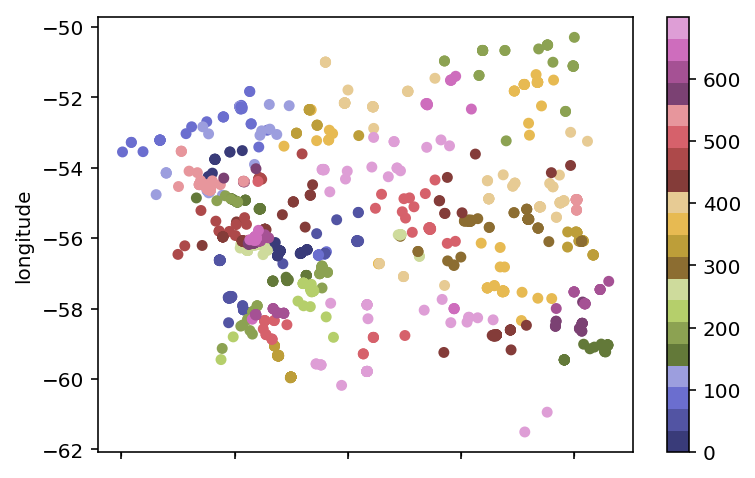

In [13]:
ax1 = locais.plot.scatter(x='latitude',
                      y='longitude',
                      c=grupos,
                      colormap='tab20b')

In [14]:
locais['GRUPOS'] = grupos

In [15]:
locais[:5]

longitude 
 latitude 
 COD_LOCALIDADE_TSE 
 NOM_LOCALIDADE_1 
 NOM_BAIRRO 
 NUM_LOCAL 
 NOM_LOCAL 
 DES_ENDERECO 
 CODIGO 
 LQTD_SECOES 
 LQTD_APTOS 
 INDIGENAS 
 CV 
 GRUPOS 
 
 
 
 
 0 
 -56.104889 
 -15.589418 
 90670 
 CUIABÁ 
 QUILOMBO 
 2593 
 COLÉGIO MAXI 
 RUA ESTEVÃO DE MENDONÇA, 1000 
 1906702593 
 16 
 6309 
 0 
 0 
 0 
 
 
 1 
 -56.098308 
 -15.592559 
 90670 
 CUIABÁ 
 CENTRO 
 1015 
 INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO... 
 RUA ZULMIRA CANAVARROS, 95 
 1906701015 
 24 
 4916 
 0 
 0 
 0 
 
 
 2 
 -56.081131 
 -15.579708 
 90670 
 CUIABÁ 
 ALVORADA 
 2488 
 ESCOLA MUNICIPAL CÂNDIDO MARIANO DA SILVA RONDON 
 RUA PIRATININGA, 101 
 1906702488 
 12 
 4571 
 0 
 100 
 1 
 
 
 3 
 -56.113951 
 -15.613200 
 90670 
 CUIABÁ 
 PORTO 
 2844 
 ESCOLA ESTADUAL JOSÉ BARNABÉ DE MESQUITA 
 RUA BARÃO DE MELGACO, 945 
 1906702844 
 13 
 4471 
 0 
 100 
 2 
 
 
 4 
 -56.128743 
 -15.618736 
 90670 
 CUIABÁ 
 COOPHAMIL 
 2810 
 ESCOLA MUNICIPAL DE EDUCAÇÃO BÁSICA PROFESSOR ... 
 RUA JOÃO PAULO DOS SANTOS, S/N 
 1906702810 
 12 
 4308 
 0 
 0 
 3

In [16]:
res1 = pd.ExcelWriter('res1.xlsx')
locais.to_excel(res1,'dados',index=False)
res1.save()